In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)

per_clf = Perceptron()
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred

array([False, False])

In [6]:
# a multi-layer perceptron for regression of housing prices
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50])
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

0.5449239817402899

In [3]:
# a multi-layer perceptron for classication of iris dataset
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

mlp_clf = MLPClassifier(hidden_layer_sizes=[10])
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy_score(y_pred, y_test)

/home/user/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.631578947368421

In [37]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [38]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

In [39]:
# simple classification MLP
tf.keras.utils.set_random_seed(0)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 300)               235500    
                                                                 
 dense_47 (Dense)            (None, 100)               30100     
                                                                 
 dense_48 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-03-03 08:13:25.912193: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f0ccc024a00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-03 08:13:25.912228: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Quadro M2000M, Compute Capability 5.0
2023-03-03 08:13:26.282484: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 7s 3ms/step - loss: 0.7164 - accuracy: 0.7620 - val_loss: 0.5085 - val_accuracy: 0.8184
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4886 - accuracy: 0.8312 - val_loss: 0.4557 - val_accuracy: 0.8380
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4428 - accuracy: 0.8455 - val_loss: 0.4588 - val_accuracy: 0.8392
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4157 - accuracy: 0.8549 - val_loss: 0.4020 - val_accuracy: 0.8576
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3950 - accuracy: 0.8618 - val_loss: 0.3889 - val_accuracy: 0.8616
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3784 - accuracy: 0.8667 - val_loss: 0.3802 - val_accuracy: 0.8636
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3637 - accuracy: 0.8711 - val_loss: 0.3839 - val_accuracy: 0.8656
Epo

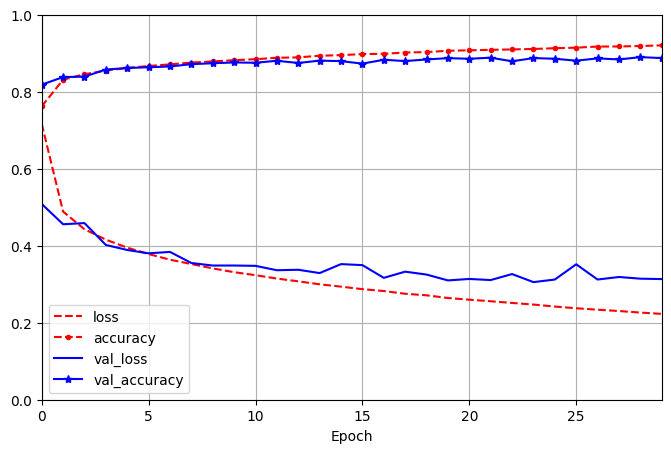

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, 29],
    ylim=[0, 1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [9]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3344 - accuracy: 0.8797


[0.3344193994998932, 0.8797000050544739]

In [10]:
y_proba = model.predict(X_test[:5])
y_proba.round(2)

1/1 [==============================] - 0s 79ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.26, 0.  , 0.02, 0.  , 0.  , 0.  , 0.72, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [11]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 6])

In [12]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [8]:
# regression with MLP

# bring back housing data
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
mse_test, rmse_test

2023-03-03 08:20:42.184733: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 08:20:42.191130: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 08:20:42.191499: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 08:20:42.192003: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Epoch 1/20


2023-03-03 08:20:44.313736: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55e2abe73a20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-03 08:20:44.313782: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Quadro M2000M, Compute Capability 5.0
2023-03-03 08:20:44.319263: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-03 08:20:44.445776: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


363/363 [==============================] - 3s 4ms/step - loss: 1.1843 - root_mean_squared_error: 1.0882 - val_loss: 0.4315 - val_root_mean_squared_error: 0.6569
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3947 - root_mean_squared_error: 0.6283 - val_loss: 0.3893 - val_root_mean_squared_error: 0.6239
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3610 - root_mean_squared_error: 0.6008 - val_loss: 0.3580 - val_root_mean_squared_error: 0.5984
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3442 - root_mean_squared_error: 0.5867 - val_loss: 0.3704 - val_root_mean_squared_error: 0.6086
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3361 - root_mean_squared_error: 0.5797 - val_loss: 0.3346 - val_root_mean_squared_error: 0.5785
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3284 - root_mean_squared_error: 0.5731 - val_loss: 0.3349 - val_root_mean_s

(0.3090047538280487, 0.5558819770812988)

In [10]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 89ms/step


array([[4.350161 ],
       [4.815143 ],
       [1.0150741]], dtype=float32)

In [11]:
y_test[:3]

array([3.872, 4.305, 1.527])

In [13]:
# wide and deep nn
norm_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

# build the model using layers as functions
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = norm_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
mse_test, rmse_test

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.4339 - root_mean_squared_error: 1.1975 - val_loss: 0.6326 - val_root_mean_squared_error: 0.7954
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5322 - root_mean_squared_error: 0.7295 - val_loss: 0.4858 - val_root_mean_squared_error: 0.6970
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4244 - root_mean_squared_error: 0.6515 - val_loss: 0.4173 - val_root_mean_squared_error: 0.6460
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3938 - root_mean_squared_error: 0.6276 - val_loss: 0.3964 - val_root_mean_squared_error: 0.6296
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3705 - root_mean_squared_error: 0.6087 - val_loss: 0.3813 - val_root_mean_squared_error: 0.6175
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3676 - root_mean_squared_error: 0.6063 - val_loss: 0.3685 - val_

(0.45758557319641113, 0.6764507293701172)

In [17]:
# send a subset of features wide and a subset of features deep
input_wide = tf.keras.layers.Input(shape=[5]) # 0-4
input_deep = tf.keras.layers.Input(shape=[6]) # 2-7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [19]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

# split data to wide and deep inputs
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))

mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
mse_test

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3338 - root_mean_squared_error: 0.5778 - val_loss: 0.3339 - val_root_mean_squared_error: 0.5779
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3384 - root_mean_squared_error: 0.5817 - val_loss: 0.3429 - val_root_mean_squared_error: 0.5856
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3299 - root_mean_squared_error: 0.5744 - val_loss: 0.3330 - val_root_mean_squared_error: 0.5771
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3284 - root_mean_squared_error: 0.5731 - val_loss: 0.3364 - val_root_mean_squared_error: 0.5800
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3394 - root_mean_squared_error: 0.5825 - val_loss: 0.3292 - val_root_mean_squared_error: 0.5738
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3285 - root_mean_squared_error: 0.5731 - val_loss: 0.3327 - val_

[0.33327504992485046, 0.5772997736930847]

In [29]:
# same model with sub-classing api and two outputs
class WideAndDeep(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
    
    def call(self, inputs):
        input_deep, input_wide = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

model = WideAndDeep(30, activation="relu", name="widedeep1")

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), optimizer=optimizer, metrics=(["RootMeanSquaredError"]))
model.norm_layer_deep.adapt(X_train_deep)
model.norm_layer_wide.adapt(X_train_wide)

history = model.fit((X_train_deep, X_train_wide), (y_train, y_train), epochs=20, validation_data=((X_valid_deep, X_valid_wide), (y_valid, y_valid)))
mse_test = model.evaluate((X_test_deep, X_test_wide), (y_test, y_test))
mse_test[0], mse_test[1], mse_test[2]

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 3.0216 - output_1_loss: 1.3149 - output_2_loss: 1.7067 - output_1_root_mean_squared_error: 1.1467 - output_2_root_mean_squared_error: 1.3064 - val_loss: 1.3139 - val_output_1_loss: 0.5470 - val_output_2_loss: 0.7669 - val_output_1_root_mean_squared_error: 0.7396 - val_output_2_root_mean_squared_error: 0.8757
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 1.1452 - output_1_loss: 0.4695 - output_2_loss: 0.6758 - output_1_root_mean_squared_error: 0.6852 - output_2_root_mean_squared_error: 0.8220 - val_loss: 1.0306 - val_output_1_loss: 0.4472 - val_output_2_loss: 0.5834 - val_output_1_root_mean_squared_error: 0.6687 - val_output_2_root_mean_squared_error: 0.7638
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.9920 - output_1_loss: 0.4238 - output_2_loss: 0.5683 - output_1_root_mean_squared_error: 0.6510 - output_2_root_mean_squared_error: 0.7538 - val_loss: 0.956

(0.8522363305091858, 0.42263340950012207, 0.42960304021835327)

In [31]:
# visualizing logs with tensorboard
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

In [33]:
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))

history = model.fit((X_train_deep, X_train_wide), (y_train, y_train), epochs=20, validation_data=((X_valid_deep, X_valid_wide), (y_valid, y_valid)), callbacks=[tensorboard_cb])

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-3)
model.compile(loss=("mse", "mse"), optimizer=optimizer, metrics=(["RootMeanSquaredError"]))
model.norm_layer_deep.adapt(X_train_deep)
model.norm_layer_wide.adapt(X_train_wide)

run_logdir = get_run_logdir()
history = model.fit((X_train_deep, X_train_wide), (y_train, y_train), epochs=20, validation_data=((X_valid_deep, X_valid_wide), (y_valid, y_valid)), callbacks=[tensorboard_cb])


Epoch 1/20
  1/363 [..............................] - ETA: 13s - loss: 0.6533 - output_1_loss: 0.3043 - output_2_loss: 0.3490 - output_1_root_mean_squared_error: 0.5516 - output_2_root_mean_squared_error: 0.5908

2023-03-03 11:26:29.724491: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-03-03 11:26:29.724517: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-03-03 11:26:29.762653: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-03-03 11:26:29.776970: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


121/363 [=========>....................] - ETA: 1s - loss: 0.6597 - output_1_loss: 0.3095 - output_2_loss: 0.3502 - output_1_root_mean_squared_error: 0.5563 - output_2_root_mean_squared_error: 0.5918

2023-03-03 11:26:30.282837: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-03-03 11:26:30.282866: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


199/363 [===============>..............] - ETA: 0s - loss: 0.6692 - output_1_loss: 0.3129 - output_2_loss: 0.3563 - output_1_root_mean_squared_error: 0.5594 - output_2_root_mean_squared_error: 0.5969

2023-03-03 11:26:30.813714: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-03-03 11:26:30.824960: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed
2023-03-03 11:26:30.911473: I tensorflow/core/profiler/backends/gpu/cupti_collector.cc:522]  GpuTracer has collected 13525 callback api events and 12993 activity events. 
2023-03-03 11:26:30.999229: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-03-03 11:26:31.002852: I tensorflow/core/profiler/rpc/client/save_profile.cc:164] Collecting XSpace to repository: logs/run_2023_03_03_11_26_29/plugins/profile/2023_03_03_11_26_31/machine.xplane.pb


363/363 [==============================] - 4s 10ms/step - loss: 0.6616 - output_1_loss: 0.3079 - output_2_loss: 0.3537 - output_1_root_mean_squared_error: 0.5549 - output_2_root_mean_squared_error: 0.5948 - val_loss: 0.6726 - val_output_1_loss: 0.3164 - val_output_2_loss: 0.3562 - val_output_1_root_mean_squared_error: 0.5625 - val_output_2_root_mean_squared_error: 0.5968
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6555 - output_1_loss: 0.3049 - output_2_loss: 0.3506 - output_1_root_mean_squared_error: 0.5522 - output_2_root_mean_squared_error: 0.5921 - val_loss: 0.6730 - val_output_1_loss: 0.3156 - val_output_2_loss: 0.3573 - val_output_1_root_mean_squared_error: 0.5618 - val_output_2_root_mean_squared_error: 0.5978
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6658 - output_1_loss: 0.3118 - output_2_loss: 0.3541 - output_1_root_mean_squared_error: 0.5584 - output_2_root_mean_squared_error: 0.5950 - val_loss: 0.6977 - val_ou

2023-03-03 11:27:07.778464: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-03-03 11:27:07.778500: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


190/363 [==============>...............] - ETA: 0s - loss: 0.6902 - output_1_loss: 0.3233 - output_2_loss: 0.3669 - output_1_root_mean_squared_error: 0.5686 - output_2_root_mean_squared_error: 0.6057

2023-03-03 11:27:08.416578: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-03-03 11:27:08.427316: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed
2023-03-03 11:27:08.513818: I tensorflow/core/profiler/backends/gpu/cupti_collector.cc:522]  GpuTracer has collected 13525 callback api events and 12993 activity events. 
2023-03-03 11:27:08.596809: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-03-03 11:27:08.599978: I tensorflow/core/profiler/rpc/client/save_profile.cc:164] Collecting XSpace to repository: logs/run_2023_03_03_11_26_29/plugins/profile/2023_03_03_11_27_08/machine.xplane.pb


363/363 [==============================] - 4s 6ms/step - loss: 0.6639 - output_1_loss: 0.3090 - output_2_loss: 0.3549 - output_1_root_mean_squared_error: 0.5559 - output_2_root_mean_squared_error: 0.5958 - val_loss: 0.6614 - val_output_1_loss: 0.3125 - val_output_2_loss: 0.3489 - val_output_1_root_mean_squared_error: 0.5591 - val_output_2_root_mean_squared_error: 0.5906
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6670 - output_1_loss: 0.3104 - output_2_loss: 0.3566 - output_1_root_mean_squared_error: 0.5571 - output_2_root_mean_squared_error: 0.5972 - val_loss: 0.6643 - val_output_1_loss: 0.3153 - val_output_2_loss: 0.3490 - val_output_1_root_mean_squared_error: 0.5615 - val_output_2_root_mean_squared_error: 0.5907
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6713 - output_1_loss: 0.3110 - output_2_loss: 0.3603 - output_1_root_mean_squared_error: 0.5577 - output_2_root_mean_squared_error: 0.6002 - val_loss: 0.6677 - val_out

In [41]:
# hyperparameter tuning with keras-tuner
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True, directory="fashion_mnist", project_name="fashion_random_search", seed=0
)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 48s]
val_accuracy: 0.6962000131607056

Best val_accuracy So Far: 0.8804000020027161
Total elapsed time: 00h 04m 10s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [44]:
random_search_tuner.get_best_hyperparameters()[0].values

{'n_hidden': 5,
 'n_neurons': 48,
 'learning_rate': 0.0008385828184982733,
 'optimizer': 'adam'}

In [54]:
best_model = random_search_tuner.get_best_models(num_models=1)[0]
best_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
test_loss, test_accuracy

Epoch 1/10
1719/1719 [==============================] - 8s 3ms/step - loss: 0.2668 - accuracy: 0.8996 - val_loss: 0.3547 - val_accuracy: 0.8724
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2579 - accuracy: 0.9025 - val_loss: 0.3594 - val_accuracy: 0.8766
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2540 - accuracy: 0.9050 - val_loss: 0.3561 - val_accuracy: 0.8776
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2482 - accuracy: 0.9062 - val_loss: 0.3477 - val_accuracy: 0.8832
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2445 - accuracy: 0.9077 - val_loss: 0.3400 - val_accuracy: 0.8804
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2383 - accuracy: 0.9089 - val_loss: 0.3432 - val_accuracy: 0.8786
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2363 - accuracy: 0.9100 - val_loss: 0.3606 - val_accuracy:

(0.3995085060596466, 0.8722000122070312)

array([9, 2, 1], dtype=uint8)